# lecture 0 - 양자컴퓨터를 위한 선형대수와 양자 역학 

## 선형대수학

### 복소수의 특징

복소수는 실수인 $a$와 $b$가 있고 $i^2 = -1$을 만족하는 허수 $i$가 있을 때, $z = a + bi$ 형태로 표현되는 수를 의미합니다. 복소수는 실수처럼, 덧셈, 뺄샘, 곱셈, 나눗셈이 가능합니다.

아래의 셀을 실행시켜 아주 간단한 복소수의 덧셈과 곱셈을 해봅시다.


Complex, Hermitian, and Unitary Matrices https://www.youtube.com/watch?v=DUuTx2nbizM

https://www.youtube.com/watch?v=osoanbLTCMw





In [9]:
a = 2 + 3j
b = 5 - 2j
print("a + b=", a+b)
print("a * b=", a*b)

a + b= (7+1j)
a * b= (16+11j)


곱셈의 과정을 잠시 자세히 살펴보겠습니다. 
$$(2 + 3i)\times(5 - 2i) = (2\times5 + 2\times(-2i) + 3i\times5 + 3i\times(-2i)) = 10 - 4i + 15i - 6i^2 = 10 - 4i + 15i + 6 = 16 + 11i $$

복소수는 켤레복소수(Complex Conjugate)라 부르는 특별한 짝을 정의해 사용하곤 합니다. 복소수 $z = a + bi$의 켤레복소수는 일반적으로 $\bar z$로 표현하며 그 값은 $\bar z = a - bi$와 같습니다. 복소수와 켤레복소수가 덧셈과 곱셈에서 갖는 특별한 성질을 다음 셀에서 확인해 봅시다.

In [10]:
a = 2 + 3j
a_bar = 2 - 3j
print("a + a_bar = ", a + a_bar)
print("a * a_bar = ", a * a_bar)

a + a_bar =  (4+0j)
a % a_bar =  (13+0j)


복소수와 켤레복소수를 더하거나 곱하면 그 결과는 실수가 됩니다. 

복소수는 복소수의 **길이**라고도 불리는 절대값(modulus, $|z|$)를 갖습니다. 복소수의 절대값은 좌표평면에서 x축을 실수축으로, y축을 허수축으로 잡았을때 원점에서부터 복소수까지의 **거리**에 해당하는 양(positive)의　실수(real)값 입니다. 아래의 노트북은 $z = 3 + 4i$의 절대값을 좌표평면에 그려본 것입니다. 우리가 잘 알듯이 이 복소수의 절대값은 $5 = \sqrt{3^2 + 4^2}$입니다.

복소수의 절대값을 계산하는데 켤레복소수가 유용하게 쓰이곤 하는데 $|z|^2 = z \times \bar z$를 만족하며 아주 간단히 다음과 같이 증명이 가능합니다. $$(a + bi)(a - bi) = a^2 -abi +abi -b^2i^2 = a^2 + b^2$$

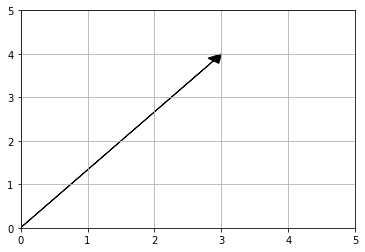

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math

z1 = 3 + 4j

x_min = 0
x_max = 5.0

y_min = 0
y_max = 5.0

def plot_complex_number_geometric_representation(z,x_min,x_max,y_min,y_max):

    fig = plt.figure()

    ax = plt.gca()

    a = [0.0,0.0]
    b = [z.real,z.imag]

    head_length = 0.2

    dx = b[0] - a[0]
    dy = b[1] - a[1]

    vec_ab = [dx,dy]

    vec_ab_magnitude = math.sqrt(dx**2+dy**2)

    dx = dx / vec_ab_magnitude
    dy = dy / vec_ab_magnitude

    vec_ab_magnitude = vec_ab_magnitude - head_length

    ax.arrow(a[0], a[1], vec_ab_magnitude*dx, vec_ab_magnitude*dy, head_width=head_length, head_length=head_length, fc='black', ec='black')

    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

    plt.grid(True,linestyle='-')

    plt.show()


plot_complex_number_geometric_representation(z1,x_min,x_max,y_min,y_max)

위에 간단하게 언급된 복소수의 성질들을 종합하면 다음과 같은 복소수의 일반적인 성질들을 얻을 수 있습니다. 여기에서 $z$와 $w$는 임의의 복소수 입니다.
$$ z + w = w + z$$
$$ zw = wz$$
$$ \overline{z + w} = \bar z + \bar w$$
$$ \overline{zw} = \bar z \bar w$$
$$ z\bar z = \bar z z = |z|^2$$
$$ \bar{\bar z} = z$$
$$ |z| = |\bar z|$$
$$ |zw| = |z||w|$$
$$ |z + w| \leq |z| + |w| （삼각부등식) $$
$$ z^{-1} = \frac{\bar z}{|z|^2}$$

### 복소수의 표현 - 오일러의 공식과 극좌표계

지금까지 복소수를 $a + bi$의 형태로 표현해 왔지만 복소수를 표현하는 다른 방식도 함께 알아보도록 하겠습니다. 오일러 공식(Euler's formula)은 수학자 레온하르트 오일러의 이름이 붙은 공식으로, 삼각함수와 지수함수에 대한 관계를 나타냅니다. 실수이면서 [라디안](https://ko.wikipedia.org/wiki/%EB%9D%BC%EB%94%94%EC%95%88)인 $\theta$가 있을때 다음의 공식이 만족되며 이를 오일러의 공식이라 부릅니다.
$$e^{i\theta} = cos\theta + i sin\theta$$

오일러의 공식을 활용하면 복소수를 극좌표계를 사용해 표현할 수 있으며 다음을 만족합니다.
$$z = a + bi = |z|e^{i\theta} = |z|(cos\theta + i sin\theta) = |z|cos\theta + i|z|sin\theta$$
$$\therefore a = |z|cos\theta,  b=|z|sin\theta, tan\theta = \frac{b}{a},  \theta = \arctan\frac{b}{a}$$

이때, $\theta$는 [복소수의 편각(argument of complex number)](https://ko.wikipedia.org/wiki/%ED%8E%B8%EA%B0%81_(%EC%88%98%ED%95%99))이라 불리며 복소수가 실수와 허수를 좌표축으로 갖는 복소수 평면에서 실수축과 복소수 사이의 각도의 크기를 뜻합니다.

![출처 위키피디아](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Complex_number_illustration_modarg.svg/440px-Complex_number_illustration_modarg.svg.png)

위키피디아에서 가져온 위의 이미지에서 $r = |z|$이며 $\phi = \theta$입니다.

참고로 복소수의 켤레복소는 극좌표계로 $\bar z = e^{-i\theta}$와 같습니다. 복소수의 극좌표계 표현의 일반적인 특성은 다음과 같습니다. $z = |z|e^{i\theta}$와 $w = |w|e^{i\phi}$는 모두 복소수입니다.

$$zw = |z||w|e^{i\theta}e^{i\phi} = |z||w|e^{i(\theta + \phi)}$$
$$\frac{1}{e^{i\theta}} = e^{-i\theta} = \overline{e^{i\theta}}$$
$$e^{\pm2\pi i} = cos(\pm2\pi)+isin(\pm2\pi) = 1, \therefore    ei^{(\theta \pm2\pi)} = e^{i\theta}e^{\pm2\pi i} = e^{i\theta}$$


### 벡터

[벡터](https://ko.wikipedia.org/wiki/%EB%B2%A1%ED%84%B0)에 대한 가장 간단한 설명은 **"벡터는 크기와 방향을 가진 양이다"** 입니다. 다소 복잡한 설명은 [위키](https://ko.wikipedia.org/wiki/%EB%B2%A1%ED%84%B0)를 참고하세요. 

일반적으로 벡터는 '행(row)'과 '열(column)'로 표현하며 차원(dimension)을 갖습니다. 예를 들어 봅시다. 
$$A =
 \begin{pmatrix}
  1, & 2 
 \end{pmatrix}$$
 
 $$B =
 \begin{pmatrix}
  3 \\
  2\\
  1
 \end{pmatrix}$$

A는 2차원의 행벡터이고, B는 3차원의 열벡터입니다. 우리가 벡터라고 부르는 것은 일반적으로 **열벡터**이며 n차원의 벡터$\vec{v}$는 다음과 같이 표현할 수 있습니다.
 $$\vec{v} =
 \begin{pmatrix}
  v_1 \\
  v_2 \\
  \dots \\
  v_n
 \end{pmatrix}$$
 
 벡터도 숫자와 마찬가지로 덧셈, 뺄셈, 곱셈, 나눗셈이 가능합니다. 여기에서 벡터의 덧셈과 곱셈에 대해 살펴보도록 합시다. 벡터의 합은 다음과 같습니다.
 $$ 
 \begin{pmatrix}
  a_1 \\
  a_2\\
  a_3
 \end{pmatrix}+
  \begin{pmatrix}
  b_1 \\
  b_2\\
  b_3
 \end{pmatrix}=
  \begin{pmatrix}
  a_1 + b_1 \\
  a_2 + b_2\\
  a_3 + b_3
 \end{pmatrix}$$
 
 자주 사용하게 될 표현을 짚어보고 다음으로 넘어가도록 하겠습니다. 만약 벡터의 합에서 $j$번째 행의 요소들만을 언급하고 싶을때는 다음과 같이 간결하게 사용합니다. $$(\vec{v} + \vec{w})_j = v_j + w_j$$

만약 더하고자 하는 두 벡터의 모양과 차원이 다르다면 어떻게 될까요? 원칙적으로 두 벡터의 모양이 다른 경우 벡터의 덧셈을 할 수 없습니다. 하지만 numpy등의 라이브러리등은 자동으로 두 벡터의 차원을 맞추어 덧셈을 합니다. 아래의 셀에서 확인해 봅시다.

In [35]:
import numpy as np
A = np.array([[1,2,3]])
B = np.array([[7], [10], [9]])
A+B

array([[ 8,  9, 10],
       [11, 12, 13],
       [10, 11, 12]])

벡터는 상수 및 다른 벡터와 곱셈도 가능합니다. 벡터와 상수의 곱은 아주 간단합니다.
 $$ 
c\times
  \begin{pmatrix}
  a_1 \\
  a_2\\
  a_3
 \end{pmatrix}=
  \begin{pmatrix}
  ca_1 \\
  ca_2\\
  ca_3
 \end{pmatrix}$$
 
벡터에 양의 상수를 곱하면 벡터가 방향을 유지하며 절대값이 늘어나게 됩니다. 만약 벡터에 음의 상수를 곱한다면 벡터는 방향이 반대로 바뀌고 절대값은 늘어나게 됩니다.

### 벡터공간 (Vector Space)
벡터 공간 또는 선형 공간(linear space)은 원소를 서로 더하거나 주어진 배수로 늘이거나 줄일 수 있는 공간으로 벡터 공간의 원소를 벡터라고 합니다. 벡터 공간에서 벡터의 선형 합과 스칼라곱 (벡터와 상수의 곱)의 결과 벡터 또한 벡터 공간의 원소가 됩니다. 벡터공간에 대하여 다음의 네 가지가 성립합니다.
 - 덧셈에 대한 항등원(identity element) 존재 : 벡터공간 $V$에는 특정한 원소 0이 존재하여 모든 $v\in V$ 에 대하여 $v+0=0+v=v$
 - 덧셈에 대한 역원(inverse element) 존재 : 벡터공간 $V$의 임의의 원소 $v$에 대하여 $v+u=u+v=0$을 만족하는 $u \in V$가 존재한다.
 - 교환법칙(commutativity) 성립 : $\forall u, v\in V$에 대하여 $u+v=v+u$가 성립한다.
 - 결합법칙(Associativity) 성립 : $\forall u, v, w \in V$에 대하여 $(u+v)+w=u+(v+w)$가 성립한다.
 - 분배법칙(Distributivity) 성립: 스칼라 상수 $c$와 $d$, $\forall u, v \in V$에 대하여, $c(u + v) = cu + cv$ 및 $(c + d)v = cv + dv$가 성립한다.


### 행렬(Matrices)

[행렬](https://ko.wikipedia.org/wiki/%ED%96%89%EB%A0%AC)은 숫자등을 직사각형 형태로 배열한 것으로 행과 열을 가집니다.행렬의 차원은 행$m$과 열$n$의 차원을 사용해 $n\times m$으로 표현합니다. 앞서 살펴본 벡터의 경우는 1차원의 열(column)과 n차원의 행을 지니고 있는 $n \times 1$차원의 행렬로 볼수 있습니다. 

행렬도 벡터와 마찬가지로 합과 상수곱이 가능하며 다음과 같습니다.

$$\begin{pmatrix}
  a_{11} & a_{12} \\
  a_{21}, & a_{22} 
 \end{pmatrix}+
 \begin{pmatrix}
  b_{11}, & b_{12} \\
  b_{21}, & b_{22} 
 \end{pmatrix}=
 \begin{pmatrix}
  a_{11}+b_{11} & a_{12} + b_{12} \\
  a_{21} + b_{21}, & a_{22} + b_{22} 
 \end{pmatrix}$$
 
 $$c \times 
 \begin{pmatrix}
  a_{11} & a_{12} \\
  a_{21}, & a_{22} 
 \end{pmatrix}=
 \begin{pmatrix}
  ca_{11} & ca_{12} \\
  ca_{21} & ca_{22}
 \end{pmatrix}$$
 
 이제 행렬과 벡터들의 곱셈에 대해 알아볼 때가 되었습니다. 두 행렬 $A, B$가 있을 때, $A$의 행의 차원과 $B$의 열의 차원이 같은 경우 $AB$를 계산할 수 있습니다. 예를 들어 $2\times3$ 행렬 $A$와 $3 \times 2$　행렬 $B$의 곱셈은 다음과 같으며 곱셈의 결과로 탄생하는 행렬의 차원은 $2 \times 2$가 됩니다.
 
 $$\begin{pmatrix}
  1 & 2 & 3 \\
  4, & 5 & 6 
 \end{pmatrix}
 \begin{pmatrix}
  1, & 2 \\
  3, & 4 \\
  5, & 6
 \end{pmatrix}=
 \begin{pmatrix}
  1*1 + 2*3 + 3*5 & 1*2 + 2*4 + 3*6 \\
  4*1 + 5*3 + 6*5 & 4*2 + 5*4 + 6*6 
 \end{pmatrix}$$
 
 이 곱셈을 행렬의 **행렬곱**이라 부르며 멋진 수식으로 표현하면 다음과 같습니다.
 
 행렬 $A,B$가 각각　$m\times n$, $n \times p$의 차원을 가질때 두 행렬의 행렬곱 $C = AB$의 $i$열 $j$행의 성분을 $c_{ij}$라 할때,
 $$c_{ij} = a_{i1}b_{1j} + a_{i2}b_{2j} + \dots + a_{in}b_{nj} = \displaystyle\sum_{k=1}^{n} a_{ik}b_{kj}$$
 가 성립합니다. 벡터의 행렬곱또한 같은 규칙을 따르게 됩니다. 예를 들어 $n \times 1$차원의 벡터 $v$는 $m \times n$ 차원의 행렬 $M$이나 $1 \times n$차원의 행벡터등과 곱셈이 가능합니다. 두 가지 경우를 아래의 셀을 실행해 확인해 봅시다.

In [46]:
A = np.array([[7], [10], [9]])
B = np.array([[1,2,3]])
C = np.array([[1, 2, 3], [5, 6, 7], [8,9,10]])

print("AB = ", np.matmul(A,B))
print("BA = ", np.matmul(B,A))
print("CA = ", np.matmul(C, A))
print("AC = ", np.matmul(A, C))

AB =  [[ 7 14 21]
 [10 20 30]
 [ 9 18 27]]
BA =  [[54]]
CA =  [[ 54]
 [158]
 [236]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

위의 계산에서 볼 수 있듯이 $3 \times 1$벡터 $A$와 $3\times 3$행렬 $C$의 곱 $AC$는 에러를 반환합니다. 예제에서 볼수 있듯이 행렬은 벡터와 연산이 가능하며 이런 경우 행렬을 벡터에 작용하는 **함수(function)**　로 볼 수 있습니다.　예를 들어 $2 \times 1$ 차원의　$\vec{v}$벡터에 $3 \times 2$　차원의 $M$행렬을 적용한 결과$M\vec{v}$는 $3$차원의 새로운 벡터가 되며 이 경우 행렬은 2차원의 벡터 공간의 벡터를 3차원의 벡터 공간으로 변환하는 함수의 역할을 수행한 것이 됩니다. 

행렬의 함수기능과 관련하여 흥미로운 것 중 하나는 행렬이 이처럼 함수와 같은 기능을 할 때 행렬의 곱이 합성함수(function composition)를 만들어내는 과정과 깊이 연관되어 있는 것입니다. 두 함수 $f, g$가 있을때 두 함수의 합성 $f \circ g$는 다음과 같습니다. 
    $$f \circ g(x) = f(g(x))$$ 
이때 함수 $f(\vec{v}) = M\vec{v}, g(\vec{v}) = N\vec{v}$라면
    $$f \circ g(x) = f(g(x)) = f(N\vec{v}) = MN\vec{v}$$ 
    $$\therefore f \circ g = MN$$
이 됩니다. 

위의 셀 예제에서 놓치면 안되는 흥미로운 결과 중 하나는 $1 \times n$차원의 벡터와 $n \times 1$차원의 벡터를 곱했을때 하나의 상수가 계산의 결과로 나오는 것이며 이것을 벡터의 스칼라곱(scalar product)혹은 점곱(dot product) 또는 내적 (inner product)라 부릅니다. 

벡터의 내적은 기하학적으로 다음의 관계를 만족합니다. 두 벡터 $u ,v$의 내적의 $u \cdot v = |u||v|cos\theta$의 상수 값으로 이 값은 두 벡터의 절대값과 두 벡터가 이루는 각도의 $cos\theta$를 곱한 값으로 두 벡터 중 하나를 다른 한 벡터에 수직 사영(scalar projection)하여 수직 사영된 길이값과 나머지 벡터의 길이값을 곱하는 것과 같은 의미를 지닙니다. 내적의 결과는 스칼라 상수로, 두 벡터가 이루는 각도의 크기와 두 벡터의 절대값에만 영향을 받습니다.

일반적으로 벡터 공간의 벡터는 열벡터를 의미하기 때문에 벡터의 전치행렬(transpose）를 정의한 후 벡터와 벡터의 스칼라 곱을 정의하기도 합니다.

벡터 및 행렬의 [전치행렬](https://ko.wikipedia.org/wiki/%EC%A0%84%EC%B9%98%ED%96%89%EB%A0%AC)이란 행렬의 행과 열의 숫자를 바꾸는 것으로  행렬을 주대각선을 기준으로 하여 뒤집어 얻는 것으로 이해할 수 있습니다. 

예를 들어 벡터 $v$가 
$A =
 \begin{pmatrix}
  1 \\ 
  2 \\
  3
 \end{pmatrix}$이라면 $A$의 전치행렬 $A^T$는 
 $\begin{pmatrix}
  1 & 2 & 3
 \end{pmatrix}$이 됩니다. 전치 행렬은 $(MN)^T = N^T M^T$와 $(M^T)^T = M$을 만족합니다. 
 
전치행렬의 정의가 이와 같을 때 벡터공간 $V$의 벡터 $u, v$의 스칼라 곱은 다음과 같이 정의 됩니다.
$$a \cdot b = a^Tb$$

행렬의 곱셈과 관련된 중요한 성질 중 하나는 행렬의 곱셈은 교환 법칙이 성립하지 않는 성질(non-commutativity)을 지닌 다는 것입니다. 예를들어 행렬 $M, N$이 있을때 $MN \neq NM$을 뜻합니다. 이 중요한 성질은 다음의 셀을 실행시켜서 쉽게 확인할 수 있습니다.

In [48]:
A = np.array([[1, 2], [3,4]])
B = np.array([[5, 6], [7,8]])
print("AB = \n", np.matmul(A,B))
print("BA = \n", np.matmul(B,A))

AB = 
 [[19 22]
 [43 50]]
BA = 
 [[23 34]
 [31 46]]


행렬 연산의 일반적인 특징은 다음과 같이 정리할 수 있습니다. 적절한 차원의 행렬 $M, N, P$과 임의의 스칼라 상수 $c,d$가 있을 때
$$M+N = N +M$$
$$(M+N)+P = M+(N +P)$$
$$c(M+N) = cM+cN$$
$$c+d)M = cM+dM$$
$$c(MN) = (cM)N = M(cN) = (MN)c$$
$$(MN)P = M(NP)$$
$$(M+N)P = MP+NP$$
$$M(N +P) = MN +MP$$
$$일반적으로, MN \neq NM$$

행렬의 이와 같은 특성에서 얻을 수 있는 중요한 개념 - 선형 함수(linear function) - 에 대해 언급하는 것으로 행렬의 소개를 마치고자 합니다. 

함수 $f$가 함수의 임의의 입력 $x,y$에 대하여 $f(x + y) = f(x) + f(y)$와 $f(cx) = cf(x)$를 만족할 경우 이 함수가 **선형성(linearity)** 을 띈다고 하며 이때 이 함수를 선형함수라 부릅니다. 앞에서 예로 든 바와 같이 함수가 행렬로 나타낼 수 있는 경우, 이 함수는 행렬의 선형성으로 인해 자연스럽게 선형 함수가 됩니다.

### 복소수 행렬
복소수 행렬은 복소수가 포함된 행렬의 요소를 가진 행렬을 의미합니다. 아주 간단히 예를 들자면
$A =
 \begin{pmatrix}
  2, & 1+i \\
  -i, & 5+i 
 \end{pmatrix}$
와 같습니다. 복소수 행렬은 실수 행렬과 별도로 정의되며 자주 사용되는 연산 두가지를 가지고 있습니다. 한가지는 1) 켤레 행렬(complex conjugate of matrix)이고 나머지 하나는 2) 켤레 전치 행렬(conjugate transpose matrix)입니다. 

켤레 행렬은 복소수 행렬의 모든 복소수가 켤레 복소수로 변환된 행렬을 의미 합니다. 예를 들어 바로 위의 행렬 A의 켤레 행렬은
$\bar A =
 \begin{pmatrix}
  2, & 1-i \\
  i, & 5-i 
 \end{pmatrix}$이 됩니다. 복소수 행렬의 켤레 전치 행렬은 켤레 행렬을 전치(transpose）한 것으로 위의 행렬 A의 켤레 전치 행렬은
 $A^{\dagger} =
 \begin{pmatrix}
  2, & -i \\
  1-i, & 5+i 
 \end{pmatrix}$이 됩니다.
 
 복소수 행렬의 켤레 행렬과 켤레 전치 행렬은 차원이 적절한 복소수 행렬 $M,N$에 대하여 
 다음과 같은 특성을 지닙니다. 
$$\overline{MN} = \bar{M}\bar{N}$$
$$(MN)^{\dagger} = N^{\dagger}M^{\dagger}$$
$$\overline{\bar M} = M$$
$$(M^{\dagger})^{\dagger} = M$$

복소수 행렬도 실수 행렬과 마찬가지로 내적을 정의할 수 있습니다. 주의할 점은 복소수 벡터 및 행렬의 경우 켤레 전치 행렬이 사용되는 것입니다. $v, u$가 복소수 행렬 (벡터 포함)일 때, 두 행렬의 내적 $v \cdot u = v^{\dagger}u$입니다.

### 힐버트 공간 (Hilbert space)
힐버트 공간은 선형 벡터 공간 중 내적이 정의되는 벡터 공간을 의미합니다. 따라서 실수, 복소수와 무관한 모든 n차원 벡터와 그의 내적이 정의되는 백터 공간은 모두 힐버트 공간입니다. 

힐버트 공간은 내적이 정의되고 존재하는 공간이기 때문에 벡터간의 내적의 성질을 이용한 몇가지 중요한 개념이 도입됩니다. 

#### 직교 벡터(Orthogonal vector)
힐버트 공간 $H$의 두 벡터 $v, u$의 내적이 0일때, 이 두 벡터가 직교(orthogonal)한다고 정의 합니다. 앞서 설명한 것과 같이 두 벡터의 스칼라 곱은 두 벡터의 절대값과 두 벡터가 이루는 각도（$\theta$）에만 영향(정확히는 $cos\theta$)에만 영향을 받기 때문에 내적이 0이라는 것은 두 벡터가 이루는 최소 각도가 $90^{\circ}$ ($cos90^{\circ} = 0$)임을 의미합니다.

#### 벡터의 노름(Norm)
n 차원의 힐버트 공간에 존재하는 벡터 $\vec{v} = (v_1, v_2, \dots , v_n)$의 길이 혹은 노름($\parallel \vec{v} \parallel$)은 다음과 같이 내적을 사용해 정의합니다.
$$\parallel \vec{v} \parallel = \sqrt{\vec{v} \cdot \vec{v}} = \sqrt{\vec{v}^{\dagger}\vec{v}} = \sqrt{|v_1|^2 + |v_2|^2 + \dots + |v_n|^2}$$
특히 노름이 1인 힐버트 공간의 벡터를 단위벡터(unit vector)라 부릅니다. 크기가 1이 아닌 힐버트 공간의 벡터($\vec{v}$)의 길이를 1로  변환하는 과정을 정규화(Normalizing)라 하며 $\frac{\vec{v}}{\parallel \vec{v} \parallel}$라 정의합니다.

### 기저(Basis)
선형대수학에서, 어떤 벡터 공간의 [기저(basis)](https://ko.wikipedia.org/wiki/%EA%B8%B0%EC%A0%80_(%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99))는 그 벡터 공간을 선형생성하는 선형독립인 벡터들입니다. 다른 표현으로, 벡터 공간의 임의의 벡터를 선형결합으로서 만들어 낼 수 있는 벡터입니다. 기저를 정확하기 이해하기 위해서 새롭게 등장한 개념 1) 선형 결합과 2) 선형 독립을 먼저 알아보도록 하겠습니다.

#### 선형 결합 (linear combination)
벡터의 선형 결합은 각 벡터에 임의의 상수를 곱한 결과를 더하여 얻습니다. 예를 들어 벡터 공간의 n개의 벡터 
$\vec{v_1} + \vec{v_2} + \dots + \vec{v_n}$
과 임의의 스칼라 상수들 $c_1, c_2, \dots , c_n$이 있을 때, 이 벡터들의 선형 결합은 다음과 같습니다.
$$c_1\vec{v_1} + c_2\vec{v_2} + \dots + c_n\vec{v_n}$$

#### 선형 의존/독립(linear dependent / independent)
벡터 공간 $V$에 벡터들의 부분집합 { $\vec{v}$ } $\subset V $의 한 벡터 $v_i$가 다른 벡터들의 선형 결합으로 만들어 질 수 있을때, 이 벡터의 집합을 선형 의존이라 한다. 선형 독립은 반대로 부분집합의 벡터들이 서로를 만들어낼 수 없는 경우를 의미한다. 예를 들어 
 $\vec{a} = 
 \begin{pmatrix}
  1\\
  0\\
  1\\ 
 \end{pmatrix}$, 
  $\vec{b} = 
 \begin{pmatrix}
  1\\
  0\\
  0\\ 
 \end{pmatrix}$, 
  $\vec{c} = 
 \begin{pmatrix}
  4\\
  0\\
  1\\ 
 \end{pmatrix}$ 일때, $\vec{c} = \vec{a} + 3\vec{b}$를 만족하므로 벡터의 집합 {$ \vec{a}, \vec{b}, \vec{c} $}는 선형 의존입니다.
 
#### 선형 생성(linear span)
n차원의 실수($\mathbb R^n$）벡터 공간 혹은 n 차원의 복소수 ($\mathbb C^n$) 벡터 공간의 선형 독립인 벡터의 집합을 벡터공간의 기저라 할때, 기저들은 벡터 공간의 임의의 벡터를 기저들의 선형 결합으로 만들어 질 수 있다, 즉 $$\vec{w} = c_1\vec{v1} + 
\dots + c_n\vec{v_n}$$
을 만족하는 임의의 스칼라 상수들이 존재한다.

#### 정규 직교 기저(Orthonormal basis)
힐버트 벡터 공간의 기저가 서로 직교하고, 노름이 1인경우에, 이 기저들을 정규 직교 기저라 부른다. 

In linear algebra, it refers to a set of n linearly independent generalized eigenvectors of an n×n matrix A {\displaystyle A} A, if the set is composed entirely of Jordan chains.[1]